<a href="https://colab.research.google.com/github/Nekokan1500/Machine-Learning/blob/main/Deep_Learning/Example_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

fashion_mnist = fetch_openml(data_id=40996)

labels_s = '0 T-shirt/top \n1 Trouser \n2 Pullover \n3 Dress \n4 Coat \n5 Sandal \n6 Shirt \n7 Sneaker \n8 Bag \n9 Ankle boot'
fashion_label_translation = {int(k): v for k, v in [item.split(maxsplit=1) for item in labels_s.split('\n')]}

def translate_label(y, translation=fashion_label_translation):
  return pd.Series(y).apply(lambda y: translation[int(y)]).values

def display_fashion(img, target, ax):
  if len(img.shape):
    w = int(np.sqrt(img.shape[0]))
    img = img.reshape((w, w))
  ax.imshow(img, cmap='Greys')
  ax.set_title(f'{target}')
  ax.grid(False)

In [17]:
# Take 10000 images from the dataset and split into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

fashion_mnist_sample = {}
fashion_mnist_sample['data'], _, fashion_mnist_sample['target'], _ = train_test_split(fashion_mnist['data'], fashion_mnist['target'], train_size=10000)

x, y = fashion_mnist_sample['data'], fashion_mnist_sample['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

translation = fashion_label_translation
y_train_translated = translate_label(y_train, translation=translation)
y_test_translated = translate_label(y_test, translation=translation)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_translated)
y_test_encoded = le.transform(y_test_translated)

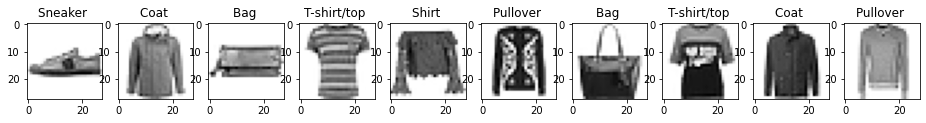

In [29]:
# display the images
import random
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(16,12))
for i in range(10):
  rand = random.choice(range(x_train.shape[0]))
  display_fashion(x_train[rand], y_train_translated[rand], ax=axs[i])
fig.show()

In [5]:
# Training a neural network model
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=500)
clf.fit(x_train, y_train_encoded)
y_test_pred = clf.predict(x_test)

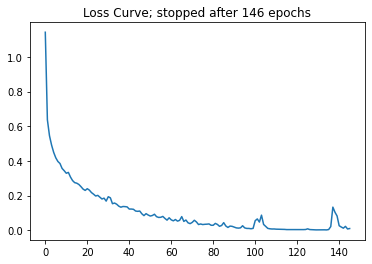

In [ ]:
pd.Series(clf.loss_curve_).plot(title=f'Loss Curve; stopped after {clf.n_iter_} epochs')

1

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.1

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.01

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.001

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.0001

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


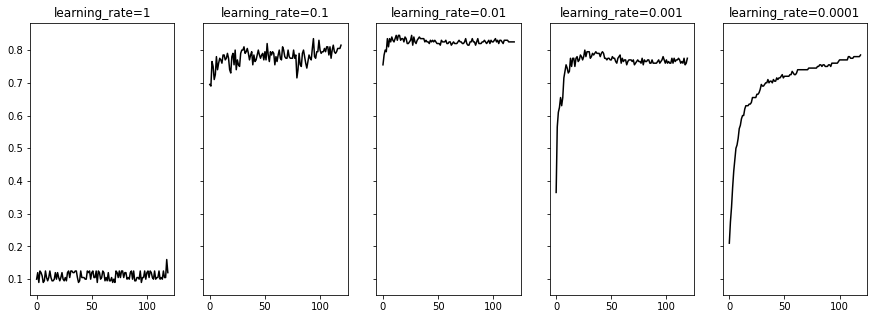

In [ ]:
# Trying different learning rates
learning_rate_init_options = [1, 0.1, 0.01, 0.001, 0.0001]

fig, axs = plt.subplots(1, len(learning_rate_init_options), figsize=(15,5), 
                        sharex=True, sharey=True)

for i, learning_rate_init in enumerate(learning_rate_init_options):
  print(f'{learning_rate_init}', end='')
  clf = MLPClassifier(
      hidden_layer_sizes=(500,),
      learning_rate='constant',
      learning_rate_init=learning_rate_init,
      validation_fraction=0.2,
      early_stopping=True,
      n_iter_no_change=120,
      max_iter=120,
      solver='sgd',
      batch_size=25,
      verbose=0
  )
  clf.fit(x_train[:1000,:],y_train_encoded[:1000])
  pd.Series(clf.validation_scores_).plot(
      title=f'learning_rate={learning_rate_init}',
      kind='line',
      color='k',
      ax=axs[i]
  )

fig.show()

1 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


100 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


1500 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


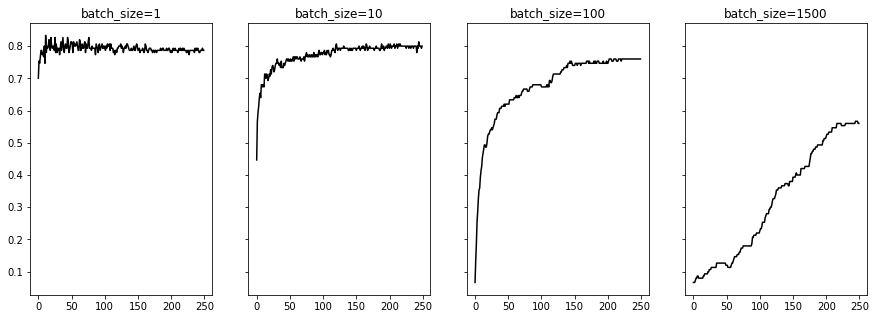

In [ ]:
# Trying different batch sizes
batch_sizes = [1, 10, 100, 1500]

fig, axs = plt.subplots(1, len(batch_sizes), figsize=(15,5), sharex=True, sharey=True)

for i, batch_size in enumerate(batch_sizes):
  print(f'{batch_size} ', end='')
  clf = MLPClassifier(
      hidden_layer_sizes=(500,),
      learning_rate='constant',
      learning_rate_init=0.001,
      momentum=0,
      max_iter=250,
      early_stopping=True,
      n_iter_no_change=250,
      solver='sgd',
      batch_size=batch_size,
      verbose=0
  )
  clf.fit(x_train[:1500,:],y_train_encoded[:1500])
  pd.Series(clf.validation_scores_).plot(
      title=f'batch_size={batch_size}',
      color='k',
      kind='line',
      ax=axs[i]
  )

fig.show()


[learning_curve] Training set sizes: [ 266  533 1333 2666 3999 5333]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:  1.2min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  3.4min finished


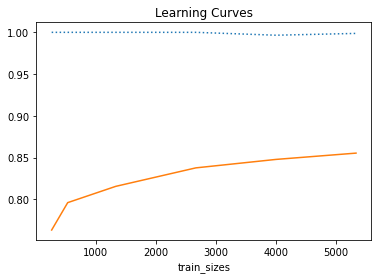

In [ ]:
# Trying different training set sizes
from sklearn.model_selection import learning_curve

train_sizes = [1, 0.75, 0.5, 0.25, 0.1, 0.05]

train_sizes, train_scores, test_scores = learning_curve(
    MLPClassifier(
        hidden_layer_sizes=(100,100),
        solver='adam',
        early_stopping=False
    ),
    x_train, y_train_encoded, train_sizes=train_sizes,
    scoring="precision_macro",
    cv=3,
    verbose=2,
    n_jobs=-1
)

df_learning_curve = pd.DataFrame(
    {
        'train_sizes': train_sizes,
        'train_scores': train_scores.mean(axis=1),
        'test_scores': test_scores.mean(axis=1)
    }
).set_index('train_sizes')

df_learning_curve['train_scores'].plot(title='Learning Curves', ls=':')
df_learning_curve['test_scores'].plot(title='Learning Curves', ls='-')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  21 | elapsed:  1.8min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  3.9min finished


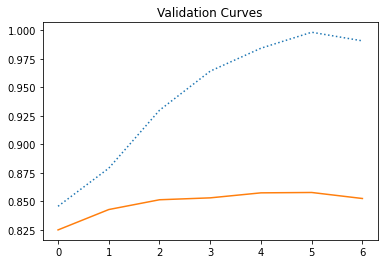

In [ ]:
# Trying different numbers of epochs (max iterations)
from sklearn.model_selection import validation_curve

max_iter_range = [5, 10, 25, 50, 75, 100, 150]

train_scores, test_scores = validation_curve(
    MLPClassifier(
        hidden_layer_sizes=(100,100),
        solver='adam',
        early_stopping=False
    ),
    x_train, y_train_encoded, param_name='max_iter', param_range=max_iter_range,
    scoring="precision_macro",
    cv=3,
    verbose=2,
    n_jobs=-1
)

df_validation_curve = pd.DataFrame(
    {
        'train_scores': train_scores.mean(axis=1),
        'test_scores': test_scores.mean(axis=1)
    }
)

df_validation_curve['train_scores'].plot(title='Validation Curves', ls=':')
df_validation_curve['test_scores'].plot(title='Validation Curves', ls='-')

In [7]:
# Tuning of network architecture
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support

param_grid = {
    'hidden_layer_sizes': [(50,), (50,50), (100,50), (100,100), (500,100), (500,100,100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'learning_rate_init': [0.01, 0.01],
    'solver': ['sgd', 'adam']
}

gs = GridSearchCV(
    estimator= MLPClassifier(
        max_iter=50,
        batch_size=50,
        early_stopping=True
    ),
    param_grid=param_grid,
    cv=4,
    verbose=2,
    n_jobs=-1
)

gs.fit(x_train[:2500,:], y_train_encoded[:2500])

Fitting 4 folds for each of 72 candidates, totalling 288 fits


GridSearchCV(cv=4,
             estimator=MLPClassifier(batch_size=50, early_stopping=True,
                                     max_iter=50),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(50,), (50, 50), (100, 50),
                                                (100, 100), (500, 100),
                                                (500, 100, 100)],
                         'learning_rate_init': [0.01, 0.01],
                         'solver': ['sgd', 'adam']},
             verbose=2)

In [8]:
gs.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (50,),
 'learning_rate_init': 0.01,
 'solver': 'adam'}

In [24]:
y_test_pred = gs.predict(x_test)
p, r, f, s = precision_recall_fscore_support(y_test_encoded, y_test_pred)
pd.DataFrame(np.array([p,r,f,s]).T,columns=['Precision','recall','f-score','support']).set_index(y_train_translated.categories).sort_index()

,Precision,recall,f-score,support
Ankle boot,0.963855,0.924855,0.943953,173.0
Bag,0.687732,0.864486,0.766046,214.0
Coat,0.595819,0.863636,0.705155,198.0
Dress,0.880208,0.800948,0.838710,211.0
Pullover,0.772414,0.530806,0.629213,211.0
Sandal,0.930348,0.890476,0.909976,210.0
Shirt,0.677419,0.495283,0.572207,212.0
Sneaker,0.934783,0.886598,0.910053,194.0
T-shirt/top,0.871795,0.960452,0.913978,177.0
Trouser,0.936893,0.965000,0.950739,200.0


In [31]:
# Adding a custom activation function - Leaky Relu
from sklearn.neural_network._base import ACTIVATIONS, DERIVATIVES

def relu(X):
  return np.clip(X, 0, np.finfo(X.dtype).max)

def inplace_relu_derivative(Z, delta):
  delta[Z == 0] = 0

leaky_relu_slope = 0.01

def leaky_relu(X):
  X_min = leaky_relu_slope*np.array(X)
  return np.clip(X, X_min, np.finfo(X.dtype).max)

def inplace_leaky_relu_derivative(Z, delta):
  delta[Z < 0] = leaky_relu_slope*delta[Z < 0]

ACTIVATIONS['leaky_relu'] = leaky_relu
DERIVATIVES['leaky_relu'] = inplace_leaky_relu_derivative

clf = MLPClassifier(activation='leaky_relu')

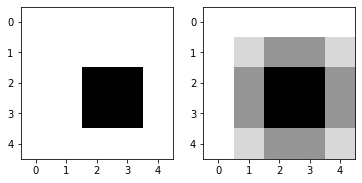

In [7]:
# Example of Convolutional Neural Network
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

x_example = np.array(
    [[0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0],
     [0, 0, 1, 1, 0],
     [0, 0, 1, 1, 0],
     [0, 0, 0, 0, 0]]
)

kernel = [[1,1,1],[1,1,1],[1,1,1]]
x_example_convolve = ndimage.convolve(x_example, kernel, mode='constant', cval=0)
x_example_convolve = x_example_convolve/9
fig, axs = plt.subplots(1, 2, figsize=(6,4))
axs[0].imshow(x_example, cmap='Greys')
axs[1].imshow(x_example_convolve, cmap='Greys')
fig.show()

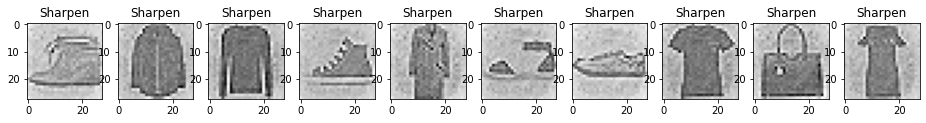

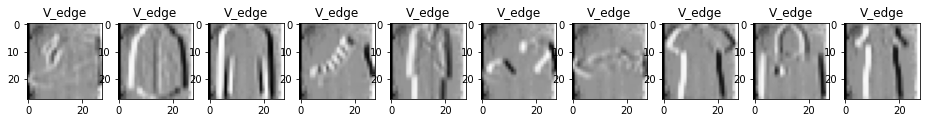

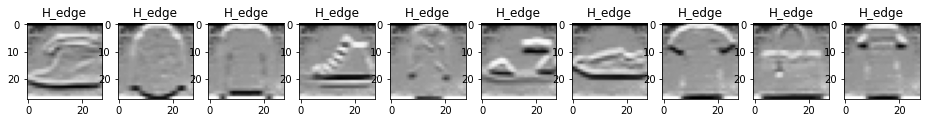

In [49]:
# Extracting features by convolving
def convolve(x, kernel=[[1,1,1],[1,1,1],[1,1,1]]):
  w = int(np.sqrt(x.shape[1]))
  x = ndimage.convolve(x.reshape((x.shape[0],w,w)),[kernel],
                       mode='constant',cval=0.0)
  x = x.reshape(x.shape[0], x.shape[1]*x.shape[2])
  return MinMaxScaler().fit_transform(x)

kernels = {"Sharpen":[[0,-1,0],[-1,5,-1],[0,-1,0]],
           "V_edge": [[-1,0,1], [-2,0,2], [-1,0,1]],
           "H_edge": [[-1,-2,-1], [0,0,0], [1,2,1]]}

rands = np.random.randint(x_train.shape[0],size=10)

for kernel_name, kernel in kernels.items():
  x_train_conv = convolve(x_train, kernel)
  x_test_conv = convolve(x_test, kernel)
  fig, axs = plt.subplots(1, 10, figsize=(16,12))
  for i, rand in enumerate(rands):
    display_fashion(x_train_conv[rand], y_train_translated[rand], ax=axs[i])
    axs[i].set_title(kernel_name)
  fig.show()

In [ ]:
!pip install scikit-image

In [52]:
# Reducing dimensionality of the data via max pooling
from skimage.measure import block_reduce

x_train_conv = convolve(x_train, kernels['Sharpen'])
x_test_conv = convolve(x_test, kernels['Sharpen'])

def maxpool(x, size=(2,2)):
  w = int(np.sqrt(x.shape[1]))
  x = np.array([block_reduce(img.reshape((w,w)),block_size=(size[0],size[1]),
                            func=np.max) for img in x])
  x = x.reshape(x.shape[0], x.shape[1]*x.shape[2])
  return MinMaxScaler().fit_transform(x)

# Reduces data to about 5% of the original by using block size (5,5)
x_train_maxpool = maxpool(x_train_conv, size=(5,5))
x_test_maxpool = maxpool(x_test_conv, size=(5,5))

In [ ]:
# Develop a pipeline using FeatureUnion
from sklearn.pipeline import FeatureUnion
from sklearn.neural_network import MLPClassifier

class ConvolutionTransformer:
  def __init__(self, kernel=[], max_pool=False, max_pool_size=(2,2)):
    self.kernel = kernel
    self.max_pool = max_pool
    self.max_pool_size = max_pool_size

  def fit(self, x):
    return x

  def transform(self, x, y=None):
    x = convolve(x, self.kernel)
    if self.max_pool:
      x = maxpool(x, self.max_pool_size)
    return x

  def fit_transform(self, x, y=None):
    x = self.fit(x)
    return self.transform(x)

kernels = [('Sharpen', [[0,-1,0], [-1,5,-1], [0,-1,0]]),
            ('V-Edge', [[-1,0,1], [-2,0,2], [-1,0,1]]),
            ('H-Edge', [[-1,-2,-1], [0,0,0], [1,2,1]])]

funion = FeatureUnion(
    [(kernel[0], ConvolutionTransformer(kernel=kernel[1], max_pool=True, max_pool_size=(4,4))) for kernel in kernels]
)

x_train_convs = funion.fit_transform(x_train)
x_test_convs = funion.fit_transform(x_test)

mlp = MLPClassifier(
    hidden_layer_sizes=(500,300),
    activation='relu',
    learning_rate_init=0.01,
    solver='adam',
    max_iter=80,
    batch_size=50,
    early_stopping=True
)

mlp.fit(x_train_convs, y_train)

In [78]:
from sklearn.metrics import precision_recall_fscore_support

y_test_predict = mlp.predict(x_test_convs)
y_test_predict
p, r, f, s = precision_recall_fscore_support(y_test, y_test_predict,average='micro')
print(f"F score is {f}")

F score is 0.808
